<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/SurpriseHousingAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
houseData = pd.read_csv("train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [7]:
houseData.shape

(1460, 81)

In [8]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
houseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


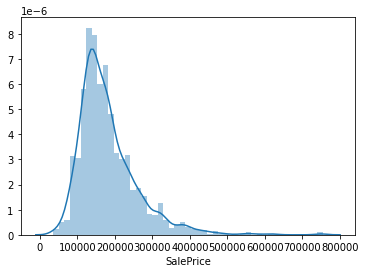

In [10]:
sns.distplot(houseData['SalePrice'])

# Data Cleaning and Imputing

In [11]:
pd.options.display.max_rows = 4000
print(round(100*(houseData.isnull().sum()/len(houseData.index)), 2) )

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [0]:
#imputing the values
houseData['LotFrontage'].fillna(0,inplace= True) # 0 means no lot frontage
houseData['Alley'].fillna('None', inplace=True)
houseData['MasVnrType'].fillna('None', inplace=True)
houseData['MasVnrArea'].fillna(0, inplace=True)
houseData['BsmtQual'].fillna('None', inplace=True)
houseData['BsmtCond'].fillna('None', inplace=True)
houseData['BsmtExposure'].fillna('None', inplace=True)
houseData['BsmtFinType1'].fillna('None', inplace=True)
houseData['BsmtFinType2'].fillna('None', inplace=True)
houseData['Electrical'].fillna('None', inplace=True)
houseData['FireplaceQu'].fillna('None', inplace=True)
houseData['GarageType'].fillna('None', inplace=True)
houseData['GarageYrBlt'].fillna(2020, inplace=True)
houseData['GarageFinish'].fillna('None', inplace=True)
houseData['GarageQual'].fillna('None', inplace=True)
houseData['GarageCond'].fillna('None', inplace=True)
houseData['PoolQC'].fillna('None', inplace=True)
houseData['Fence'].fillna('None', inplace=True)
houseData['MiscFeature'].fillna('None', inplace=True)

In [13]:
print(round(100*(houseData.isnull().sum()/len(houseData.index)), 2) )

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

# All Values are Imputed  and available
# Create the Dummy Variables

In [14]:
ObjectVars = list(houseData.columns[houseData.dtypes == 'object'])
print(ObjectVars)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In Addition Following Variables are also categorical even if type is int


In [15]:
ObjectVars.extend(["MSSubClass", "OverallQual", "OverallCond"])
print(ObjectVars)
#note Scaling columns too 
AllColumns = list(houseData.columns.values.tolist()) 
print(AllColumns)
ScalingColums = [ele for ele in AllColumns if ele not in ObjectVars] 
print (ScalingColums)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond']
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterC

In [0]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
houseDataDummies = pd.get_dummies(houseData[ObjectVars], drop_first=True)

# Adding the results to the master dataframe
houseData = pd.concat([houseData, houseDataDummies], axis=1)

In [17]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [18]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 308 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(38), object(43), uint8(224)
memory usage: 1.2+ MB


In [19]:
#remove duplicate colums 
#Drop UnNecessary Variables
print(len(ObjectVars))
houseData.drop(ObjectVars, axis=1, inplace=True)
#drop ID Too 
houseData.drop("Id",axis=1, inplace=True)
houseData.info()

46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 258 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(31), uint8(224)
memory usage: 707.3 KB


In [20]:
# Need to create Age Variable (Derived Variable)
import datetime
houseData["Age"] =  datetime.datetime.now().year -houseData['YearBuilt'] 
houseData.drop(['YearBuilt'], axis = 1, inplace = True)
#also add age in scaling colums
ScalingColums.append("Age")
ScalingColums.remove('YearBuilt')
ScalingColums.remove('Id')
ScalingColums.remove('MoSold')
ScalingColums.remove('YrSold')
print (ScalingColums)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']


In [21]:
houseData.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
0,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,17
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,44
2,68.0,11250,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,19
3,60.0,9550,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,105
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,20


Now the data is understood , cleaned , imputed and categorical variables are converted to dummy. 

Also 1 derived variable of age is also created. 

**Preparation for Regression :  Test Train Split and Scaling**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
train, test = train_test_split(houseData, train_size = 0.7, test_size = 0.3, random_state = 1)
standardScaler = StandardScaler()

In [24]:
#Standard Scaling
train[ScalingColums] = standardScaler.fit_transform(train[ScalingColums])

train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
632,0.777829,0.119693,-0.413672,0.628904,0.800030,-0.277716,0.001117,0.725552,0.611304,-0.792192,-0.11567,-0.208447,-0.853023,-0.241048,0.810776,-0.757501,0.134717,-0.204771,-0.333335,0.583848,-0.121215,0.321577,0.344984,0.770782,-0.698896,-0.360244,-0.113768,-0.286400,-0.061799,-0.089468,4,2009,-1.284504,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-0.182708
208,-1.610251,0.355738,0.171516,0.160708,1.324711,-0.277716,-1.075189,0.214666,0.022381,1.235713,-0.11567,1.021510,1.078100,-0.241048,0.810776,1.267129,0.134717,-0.204771,0.280988,0.583848,0.300522,0.321577,-0.089051,-0.290158,0.127903,-0.360244,-0.113768,2.397258,-0.061799,-0.089468,4,2007,1.238151,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,-0.548874
83,0.637353,-0.168465,-1.242687,-0.197665,-0.974816,-0.277716,1.143552,0.009420,-0.270806,-0.792192,-0.11567,-0.862156,-0.853023,-0.241048,-1.049454,1.267129,0.134717,-0.204771,-0.333335,-0.952514,-0.236235,0.321577,-0.055292,-0.177634,-0.698896,-0.360244,-0.113768,-0.286400,-0.061799,-0.089468,7,2007,-0.713826,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.383185
1174,0.637353,0.566109,-1.730344,-0.579158,0.111252,-0.277716,-0.261119,-0.242676,-0.003114,1.909382,-0.11567,1.556191,-0.853023,-0.241048,0.810776,1.267129,1.373867,-0.204771,1.509636,0.583848,-1.846506,0.321577,-0.542376,-0.772404,-0.698896,-0.360244,-0.113768,-0.286400,-0.061799,-0.089468,7,2006,0.745293,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.315243
250,-0.065023,-0.507779,-0.950094,-0.579158,-0.974816,-0.277716,0.375087,-0.742407,0.343611,-0.792192,-0.11567,-0.406827,-0.853023,-0.241048,-1.049454,-0.757501,0.134717,-0.204771,-0.333335,-0.952514,1.527396,-2.449143,-2.278516,1.341440,-0.698896,-0.360244,-0.113768,-0.286400,-0.061799,0.679161,5,2010,-1.362323,0,0,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.048941


In [25]:
#test transform
test[ScalingColums] = standardScaler.transform(test[ScalingColums])
test.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
258,0.637353,0.170945,0.756703,0.415037,-0.195352,-0.277716,0.087768,-0.218136,-0.530850,1.113854,-0.115670,0.511389,-0.853023,-0.241048,0.810776,1.267129,0.134717,-0.204771,0.280988,0.583848,0.798940,0.321577,0.441437,-0.772404,0.744244,-0.360244,7.898179,-0.2864,-0.061799,-0.089468,5,2008,0.648019,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,-0.981615
267,0.075452,-0.215597,0.561640,-0.579158,-0.158646,-0.277716,-0.505112,-0.760255,-0.303949,0.863240,8.626266,1.267123,-0.853023,-0.241048,0.810776,1.267129,1.373867,-0.204771,0.895312,0.583848,-1.578127,-1.063783,-1.121089,1.333402,-0.338111,-0.360244,-0.113768,-0.2864,-0.061799,-0.089468,7,2008,-0.026419,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.082229
288,-1.610251,-0.079661,-0.901328,-0.399972,-0.003185,-0.277716,-0.299884,-0.398842,-0.691465,-0.792192,-0.115670,-1.173896,-0.853023,-0.241048,-1.049454,-0.757501,0.134717,-0.204771,-0.947659,-0.952514,-0.389594,-1.063783,-0.928185,-0.772404,-0.698896,-0.360244,-0.113768,-0.2864,-0.061799,-0.089468,2,2010,-0.772191,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.150170
649,-1.020255,-0.834831,-0.755031,-0.579158,-0.691963,2.748557,-1.284978,-0.961039,-1.379817,-0.792192,-0.115670,-1.684016,1.078100,-0.241048,-1.049454,-0.757501,-2.343585,-0.204771,-2.176307,-0.952514,1.527396,-2.449143,-2.278516,-0.772404,-0.698896,-0.360244,-0.113768,-0.2864,-0.061799,-0.089468,12,2007,-1.258564,0,0,0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.050307
1233,-1.610251,0.144601,-1.291453,0.461278,1.184364,-0.277716,-0.856280,0.283825,0.042776,-0.792192,-0.115670,-0.629768,1.078100,-0.241048,-1.049454,-0.757501,0.134717,-0.204771,-0.333335,-0.952514,-0.811332,0.321577,0.282290,-0.772404,-0.698896,-0.360244,-0.113768,-0.2864,-0.061799,-0.089468,5,2010,-0.512792,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.416473


In [0]:
Y_train = train.pop('SalePrice')
Y_test =  test.pop('SalePrice')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 632 to 235
Columns: 257 entries, LotFrontage to Age
dtypes: float64(31), int64(2), uint8(224)
memory usage: 494.5 KB


**Recursive Feature Elimination**

In [0]:
#257 Columns, we go for RFE Before attempting Regression and Regularization
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
LRModel = LinearRegression()
LRModel.fit(train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Build Linear Regression with Just top 50 variables for simplicity
rfe = RFE(LRModel, 50)         
rfe = rfe.fit(train, Y_train)

In [37]:
list(zip(train.columns,rfe.support_,rfe.ranking_))
#The Ranking also helps answer "Which variables are significant in predicting the price of a house" ? 

[('LotFrontage', False, 191),
 ('LotArea', False, 75),
 ('YearRemodAdd', False, 119),
 ('MasVnrArea', False, 143),
 ('BsmtFinSF1', False, 34),
 ('BsmtFinSF2', False, 35),
 ('BsmtUnfSF', False, 36),
 ('TotalBsmtSF', False, 22),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 206),
 ('BsmtHalfBath', False, 165),
 ('FullBath', False, 152),
 ('HalfBath', False, 154),
 ('BedroomAbvGr', False, 201),
 ('KitchenAbvGr', False, 167),
 ('TotRmsAbvGrd', False, 179),
 ('Fireplaces', False, 142),
 ('GarageYrBlt', False, 123),
 ('GarageCars', False, 155),
 ('GarageArea', False, 67),
 ('WoodDeckSF', False, 169),
 ('OpenPorchSF', False, 183),
 ('EnclosedPorch', False, 198),
 ('3SsnPorch', False, 177),
 ('ScreenPorch', False, 148),
 ('PoolArea', False, 133),
 ('MiscVal', False, 182),
 ('MoSold', False, 195),
 ('YrSold', False, 193),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM

In [39]:
importantColumns = train.columns[rfe.support_]
print(importantColumns)

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition2_PosN',
       'BldgType_Duplex', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Po', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtExposure_Gd',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None',
       'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Gd', 'PoolQC_None',
       'SaleType_Con'],
      dtype='object')


In [0]:
train50 = train[importantColumns]

In [0]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
def LinearRegressionAnalysis(X_input, Y_input):
    X_input = sm.add_constant(X_input)
    LinearRegressionModel1 = sm.OLS(Y_input,X_input).fit() 
    print(LinearRegressionModel1.summary())
    print(LinearRegressionModel1.params)
    return LinearRegressionModel1

In [44]:
LRM_50Variables=LinearRegressionAnalysis(train50, Y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:50:10   Log-Likelihood:                -466.70
No. Observations:                1021   AIC:                             1031.
Df Residuals:                     972   BIC:                             1273.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.6117 

**Adjusted RSquared is good at 0.847**

In [0]:
# not checking p values much as it wont be evaluated
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIFAnalysis(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [47]:
VIFAnalysis(train50)

                Features      VIF
0               1stFlrSF      inf
1               2ndFlrSF      inf
2           LowQualFinSF      inf
3              GrLivArea      inf
31         BsmtCond_None      inf
29         BsmtQual_None      inf
46         GarageCond_TA  2356.12
41         GarageQual_TA  1576.75
15      RoofMatl_CompShg  1138.02
48           PoolQC_None   907.26
8            Street_Pave   553.08
6            MSZoning_RL   367.10
7            MSZoning_RM    71.81
42         GarageCond_Fa    67.33
38         GarageQual_Fa    64.90
24          ExterQual_TA    39.55
44       GarageCond_None    38.95
43         GarageCond_Gd    24.79
39         GarageQual_Gd    22.14
4            MSZoning_FV    19.66
23          ExterQual_Gd    19.62
45         GarageCond_Po    17.56
36        KitchenQual_TA    16.49
30           BsmtQual_TA    13.37
35        KitchenQual_Gd    11.85
18      RoofMatl_Tar&Grv    11.76
28           BsmtQual_Gd    11.60
40         GarageQual_Po     7.43
20      RoofMa

In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

**RIDGE REGULARIZATION**

In [78]:
#wont fix VIF /P Values as we will be evaluated on Ridge Lasso [as  discussed in tutorial video]
#Following Standard Steps mentioned in Notebook

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(train50, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005534,0.001854,0.001480,0.000049,0.0001,{'alpha': 0.0001},-0.349303,-0.282221,-0.370889,-0.308009,-0.268420,-0.315768,0.038962,23,-0.259611,-0.266192,-0.253655,-0.266436,-0.269549,-0.263089,0.005721
1,0.003885,0.000023,0.001394,0.000038,0.001,{'alpha': 0.001},-0.349267,-0.282397,-0.370493,-0.307657,-0.268393,-0.315641,0.038835,22,-0.259638,-0.266299,-0.253771,-0.266492,-0.269656,-0.263171,0.005722
2,0.003831,0.000041,0.001444,0.000049,0.01,{'alpha': 0.01},-0.348894,-0.283936,-0.366988,-0.304521,-0.268139,-0.314495,0.037739,21,-0.259883,-0.267262,-0.254806,-0.267307,-0.270855,-0.264022,0.005832
3,0.003942,0.000093,0.001432,0.000039,0.05,{'alpha': 0.05},-0.347220,-0.288051,-0.358268,-0.295398,-0.268180,-0.311424,0.035068,20,-0.260616,-0.270168,-0.258152,-0.270600,-0.274689,-0.266845,0.006341
4,0.004271,0.000237,0.001605,0.000074,0.1,{'alpha': 0.1},-0.345244,-0.290580,-0.352789,-0.289226,-0.268438,-0.309256,0.033485,19,-0.261210,-0.272123,-0.260742,-0.273461,-0.277475,-0.269002,0.006787


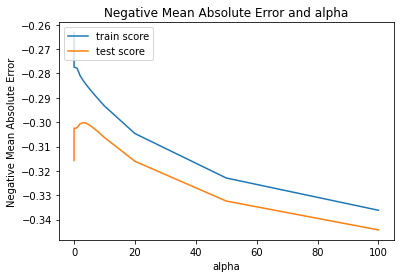

In [80]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished


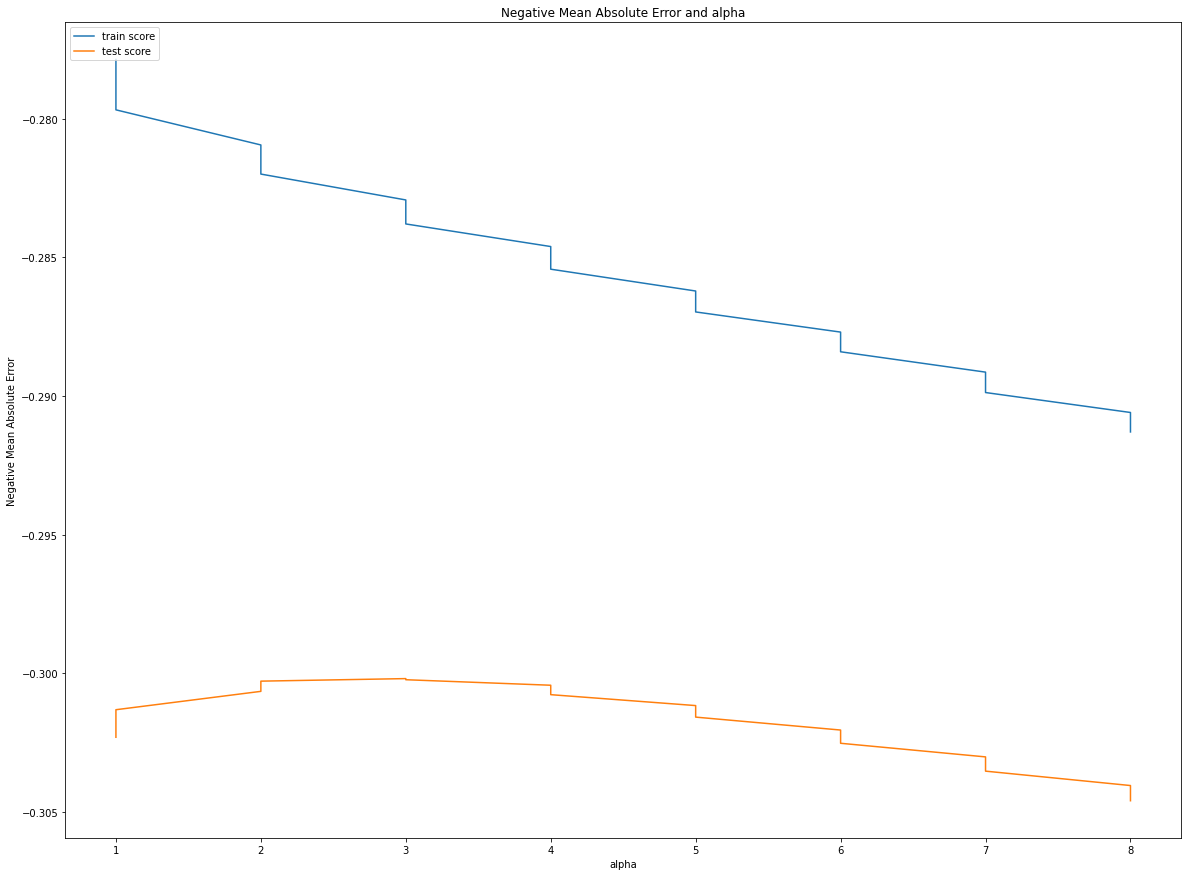

In [86]:
#seems like best value is occuring somewhere between 1 to 5
# we should repeat to find best  (should have made it function)
# list of alphas to tune
params = {'alpha': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(train50, Y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,15))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Seems Like Best Value of Alpha is at 3**

In [87]:
model_cv.best_params_

{'alpha': 3}

In [89]:
#Finding Coffecients 
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(train50, Y_train)
ridge.coef_

array([ 0.20774795,  0.12042967,  0.0023494 ,  0.25313082,  0.13729021,
        0.13087107,  0.17035334, -0.10384816, -0.06423392, -0.35664715,
        0.58380831, -0.9134431 , -0.32379954, -0.15564077,  0.11502532,
        0.34893477,  0.22028083,  0.09294748,  0.0667511 , -0.09124901,
        0.98067593, -0.27672517, -0.61707311, -0.47426671, -0.74208284,
       -0.18761977, -0.17539729, -0.71430769, -0.40787413, -0.44929123,
       -0.60438421, -0.44929123,  0.43075967, -0.17466632, -0.5504317 ,
       -0.43639981, -0.6052377 , -0.25193677, -0.21594164,  0.04617878,
       -0.02412079, -0.12647176, -0.05986146,  0.17933221, -0.2081687 ,
       -0.12476989,  0.14576328, -0.57184401,  0.57691107,  0.26105213])

**LASSO REGULARIZATION**

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.8s finished


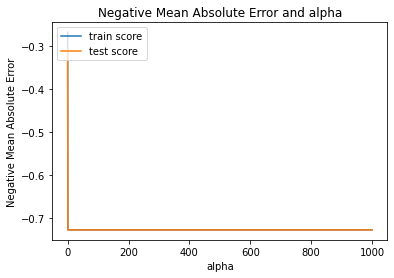

In [90]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 10

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(train50, Y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Seems Like We need to repeat with smaller values of Alpha**

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.0s finished


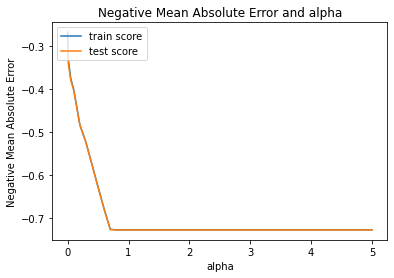

In [91]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, ]}

folds = 10

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(train50, Y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Repeat again with Smaller Values of Alpha**

In [92]:
model_cv.best_params_

{'alpha': 0.001}

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    6.7s finished


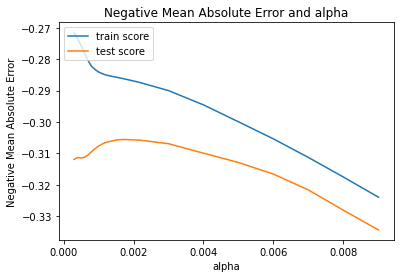

{'alpha': 0.0017}


In [93]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [ 0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,0.0017, 0.0018, 0.0019,0.0020, 0.0021, 0.0022,
                    0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]}

folds = 10

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(train50, Y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
print (model_cv.best_params_)

**Best Value of Alpha is 0.0017**

In [94]:
alpha =.0017

lasso = Lasso(alpha=alpha)
        
lasso.fit(train, Y_train) 

Lasso(alpha=0.0017, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
lasso.coef_

array([-1.77055224e-02,  6.30494765e-02,  6.77392680e-02,  4.39773903e-02,
        2.92275222e-03,  6.27082431e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.14665845e-03, -1.35666163e-02,  2.75538670e-01,
        3.06502276e-02,  9.82276856e-03,  6.45451121e-02,  1.62614582e-02,
       -2.22659651e-02, -8.76621686e-02,  9.02961504e-02,  5.08551334e-02,
       -0.00000000e+00,  1.42688406e-01, -0.00000000e+00,  3.66289959e-02,
        1.12025904e-02,  1.21579632e-02,  7.05173419e-03,  3.77732175e-02,
       -3.41827637e-02, -0.00000000e+00, -8.38520924e-04, -1.47168290e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.11356140e-02,
        0.00000000e+00, -0.00000000e+00,  1.52492766e-02,  0.00000000e+00,
       -1.57870210e-01,  0.00000000e+00,  2.77784344e-01, -0.00000000e+00,
        2.13130546e-01, -0.00000000e+00,  9.30968597e-02, -0.00000000e+00,
       -0.00000000e+00, -6.91234102e-03,  3.55714165e-02, -0.00000000e+00,
        0.00000000e+00,  